Q1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = {
    'Age': [25, 30, np.nan, 35, 40],
    'Salary': [50000, 54000, np.nan, 58000, 62000],
    'Country': ['India', 'USA', 'India', 'UK', np.nan],
    'Purchased': ['No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

print("Original Dataset:")
print(df)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

imputer = SimpleImputer(strategy='mean')
X[['Age', 'Salary']] = imputer.fit_transform(X[['Age', 'Salary']])

categorical_features = ['Country']
numerical_features = ['Age', 'Salary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_processed = pipeline.fit_transform(X)

print("\nProcessed Dataset:")
print(X_processed)


feature_names = (
    numerical_features + list(pipeline.named_steps['preprocessor']
                              .named_transformers_['cat']
                              .get_feature_names_out(categorical_features))
)

print("\nFeature Names:")
print(feature_names)

Original Dataset:
    Age   Salary Country Purchased
0  25.0  50000.0   India        No
1  30.0  54000.0     USA       Yes
2   NaN      NaN   India        No
3  35.0  58000.0      UK       Yes
4  40.0  62000.0     NaN        No

Processed Dataset:
[[-1.5 -1.5  1.   0.   0.   0. ]
 [-0.5 -0.5  0.   0.   1.   0. ]
 [ 0.   0.   1.   0.   0.   0. ]
 [ 0.5  0.5  0.   1.   0.   0. ]
 [ 1.5  1.5  0.   0.   0.   1. ]]

Feature Names:
['Age', 'Salary', 'Country_India', 'Country_UK', 'Country_USA', 'Country_nan']


Q2


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


Q3

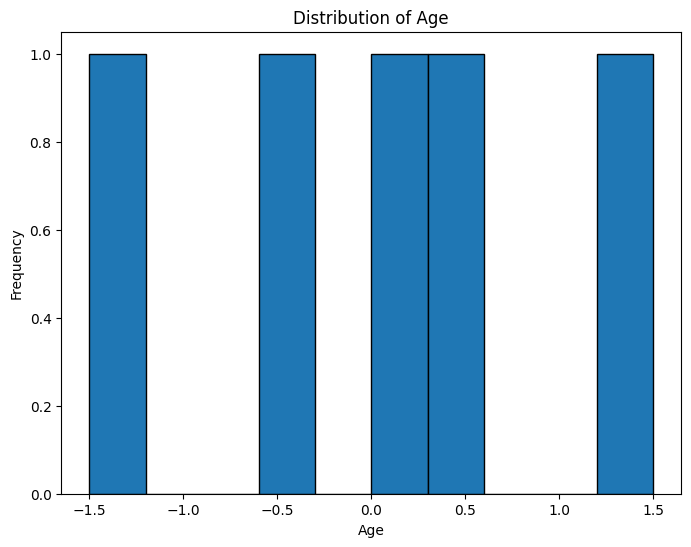

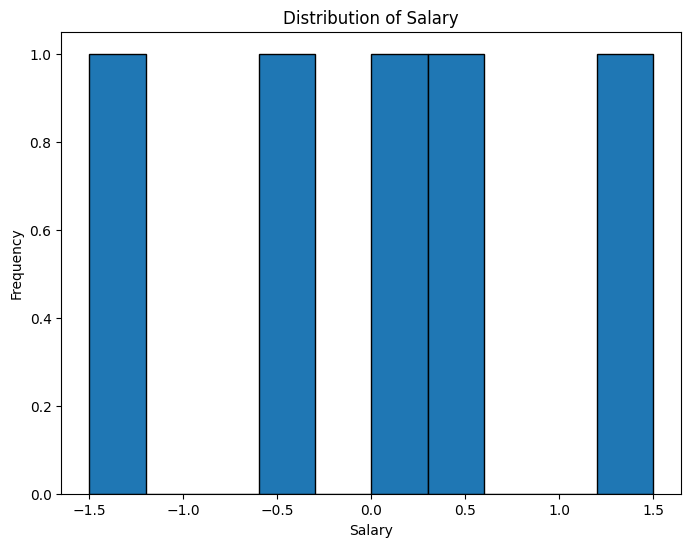

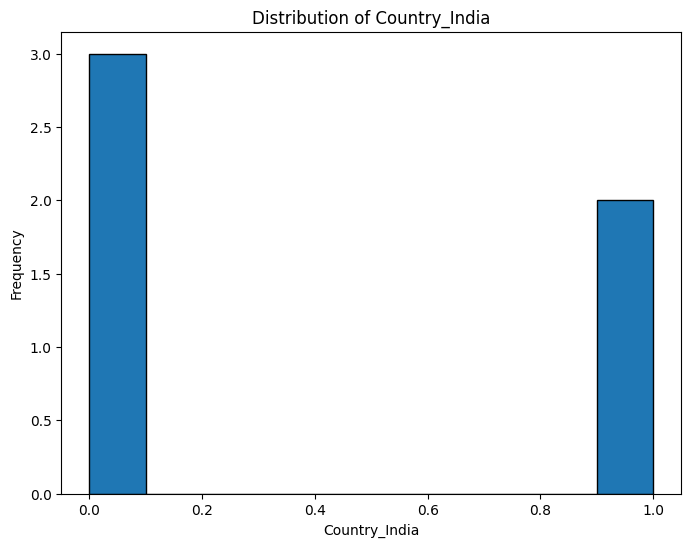

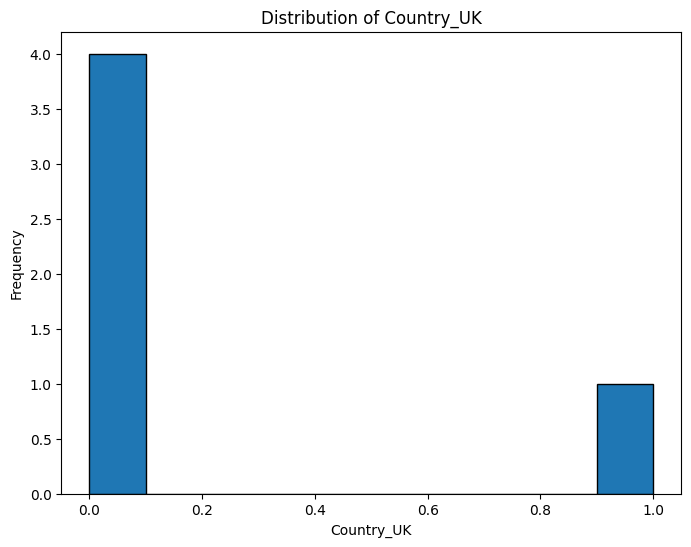

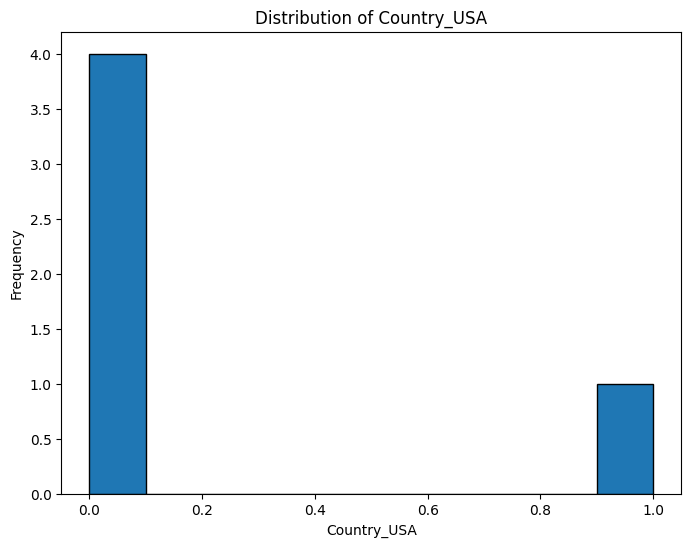

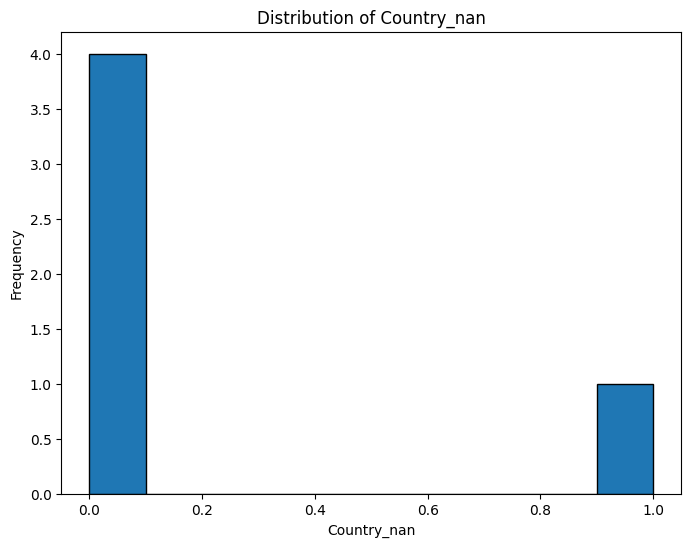

In [ ]:
import matplotlib.pyplot as plt



df_processed = pd.DataFrame(X_processed, columns=feature_names)


for col in df_processed.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_processed[col], bins=10, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Q4


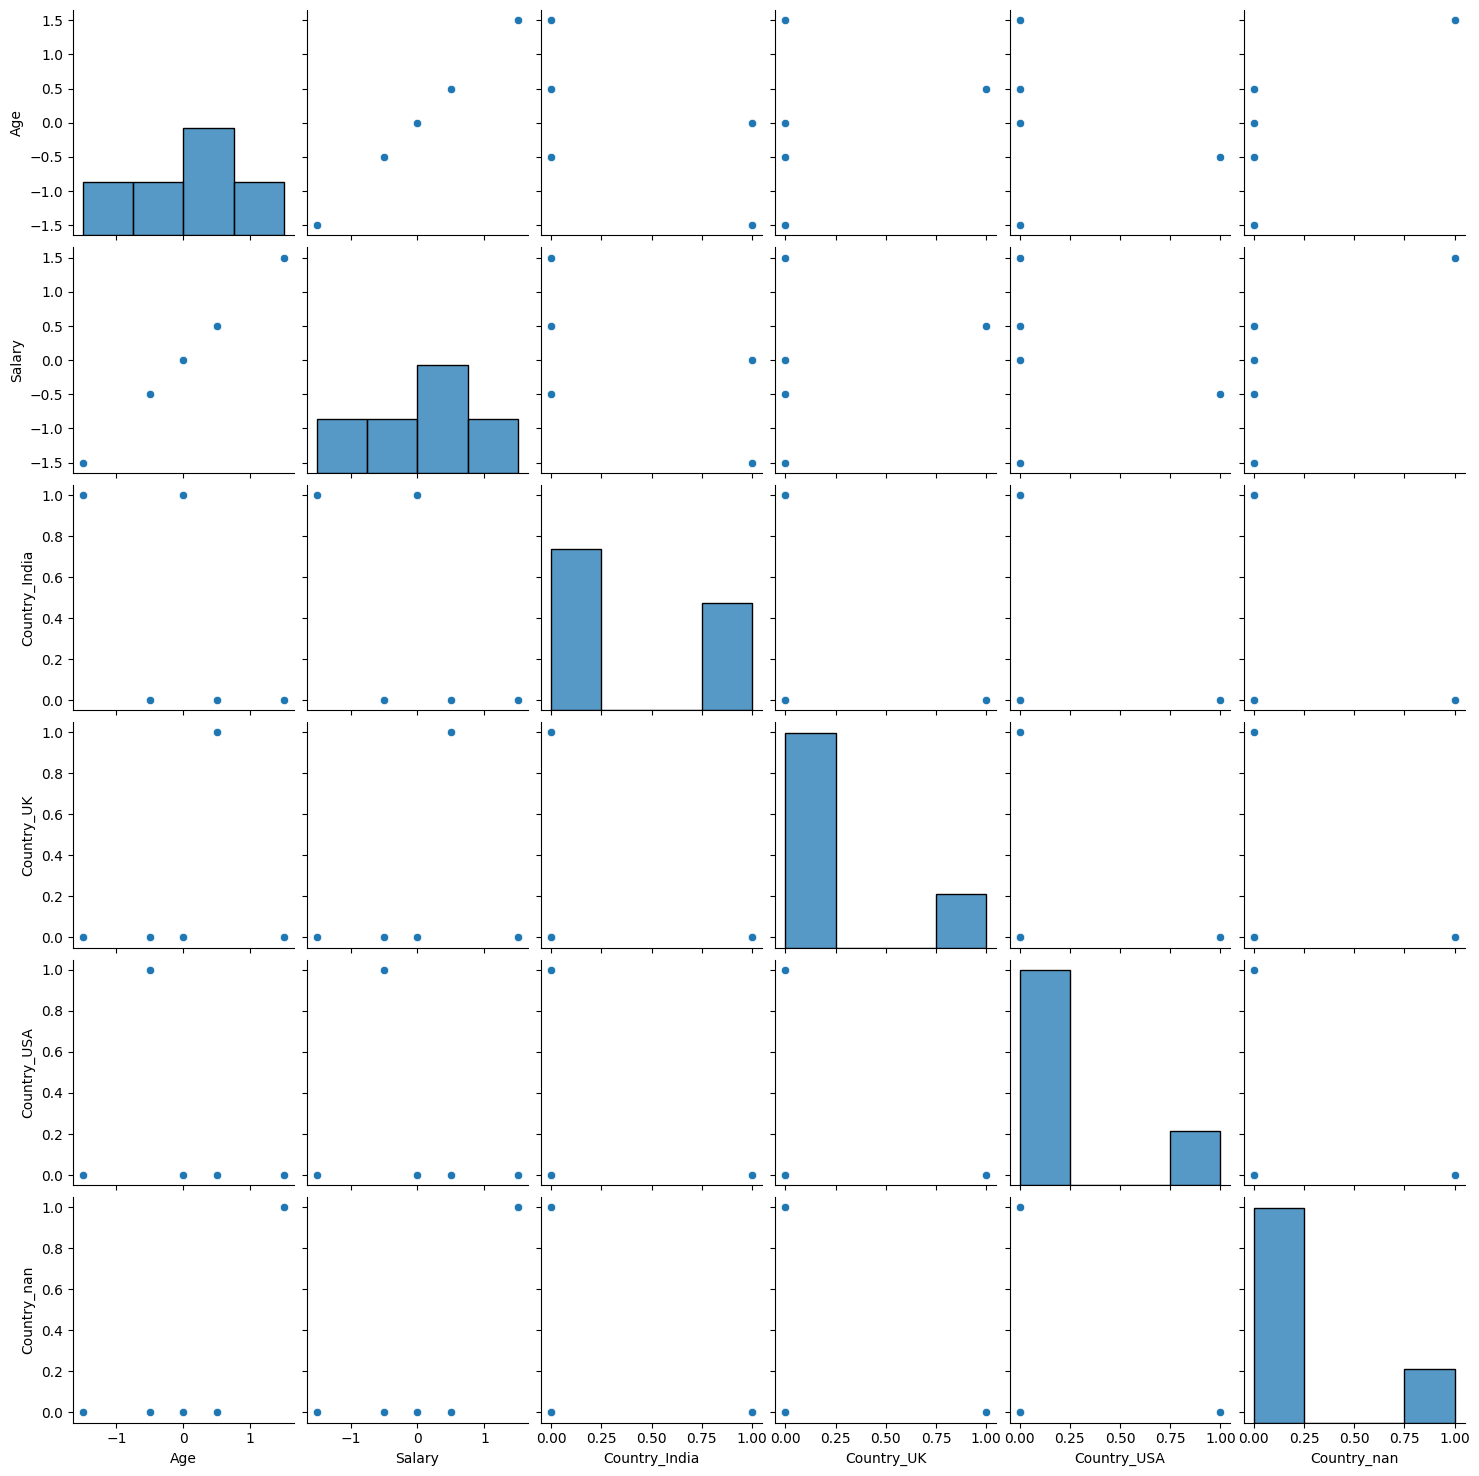

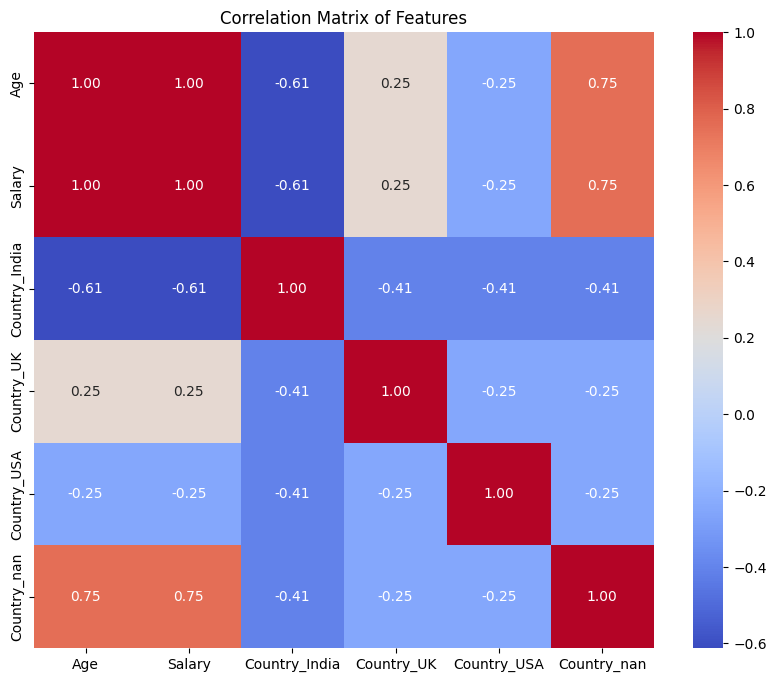

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.pairplot(df_processed)
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()